<a href="https://colab.research.google.com/github/xiaowei-v/replication-material-topic-trend-consumer/blob/main/Topic_modeling_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyLDAvis
!pip install pandas==1.5.3

In [ ]:
import numpy as np
import pandas as pd
import nltk
import json
import glob
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

import spacy
from nltk.corpus import stopwords

import pyLDAvis
import pyLDAvis.gensim

In [ ]:
nltk.download("stopwords")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/wos_filtered.csv', index_col=0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])


In [ ]:
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Authors,Author Full Names,Article Title,Source Title,Document Type,Cited References,Cited Reference Count,"Times Cited, WoS Core","Times Cited, All Databases",Publication Date,Publication Year,DOI,DOI Link,Author Keywords,Keywords Plus,Abstract
0,"Soni, N; Dawra, J","Soni, Nitin; Dawra, Jagrook",Judgments of acquisition value and transaction...,JOURNAL OF INDIAN BUSINESS RESEARCH,Article,NaN,66,3,4,NaN,2020,10.1108/JIBR-06-2018-0170,0.0,Consumer decision-making styles; Acquisition v...,PURCHASE DECISIONS; SALES PROMOTION; BRAND LOY...,Purpose An open question of behavioral pricing...
1,"Zong, Y; Guo, XJ","Zong, Yi; Guo, Xiaojie",An Experimental Study on Anchoring Effect of C...,FRONTIERS IN PSYCHOLOGY,Article,NaN,68,4,4,FEB 8,2022,10.3389/fpsyg.2022.794135,0.0,consumer experience; decision-making bias; anc...,SOCIAL MEDIA; DECISION; NUMBERS; NEED,Consumers are prone to cognitive biases in dec...
2,"Simonson, H; Bettman, JR; Kramer, T; Payne, JW","Simonson, Hamar; Bettman, James R.; Kramer, Th...",Directions for judgment and decision making re...,JOURNAL OF CONSUMER PSYCHOLOGY,Article,NaN,7,0,0,JAN,2013,10.1016/j.jcps.2012.10.006,0.0,Decision Making; Preferences; Choice and Judgm...,PREFERENCE REVERSALS,Our target article proposed an alternative per...
3,"Dietvorst, BJ; Bartels, DM","Dietvorst, Berkeley J.; Bartels, Daniel M.",Consumers Object to Algorithms Making Morally ...,JOURNAL OF CONSUMER PSYCHOLOGY,Article,NaN,55,11,13,JUL,2022,10.1002/jcpy.1266,0.0,Morality; Judgment; Decision-making; Values; C...,PROCEDURAL JUSTICE; PEOPLE; JUDGMENT; SUPPORT;...,Why do consumers embrace some algorithms and f...
4,"Fennis, BM; Stroebe, W","Fennis, Bob M.; Stroebe, Wolfgang",Softening the Blow: Company Self-Disclosure of...,JOURNAL OF BUSINESS ETHICS,Article,NaN,47,45,57,MAR,2014,10.1007/s10551-013-1647-9,0.0,Consumer behavior; Social influence processes;...,STEALING THUNDER; PRODUCT FAILURE; MODERATING ...,Is self-disclosure of negative information a v...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1109,"Hazlett, RL; Hazlett, SY","Hazlett, RL; Hazlett, SY",Emotional response to television commercials: ...,JOURNAL OF ADVERTISING RESEARCH,Article,NaN,73,114,154,MAR-APR,1999,NaN,NaN,NaN,RESEARCH VALIDITY PROJECT; CONSUMER DECISION-M...,As television commercials increasingly contain...
1110,"Wagner, U; Ebster, C; Eberhardsteiner, L; Pren...","Wagner, Udo; Ebster, Claus; Eberhardsteiner, L...",The After-Effects of Fear-Inducing Public Serv...,DYNAMIC PERSPECTIVES ON MANAGERIAL DECISION MA...,Article; Book Chapter,NaN,65,0,0,NaN,2016,10.1007/978-3-319-39120-5_22,0.0,NaN,TELEVISION ADVERTISEMENTS; AUTOMATIC ACTIVATIO...,Messages using fear appeals often appear in so...
1111,"Cadario, R; Chandon, P","Cadario, Romain; Chandon, Pierre",Which Healthy Eating Nudges Work Best? A Meta-...,MARKETING SCIENCE,Article,NaN,179,192,207,MAY-JUN,2020,10.1287/mksc.2018.1128,0.0,meta-analysis; health; food; field experiment;...,TRAFFIC-LIGHT LABELS; CHOICE ARCHITECTURE; FOO...,We examine the effectiveness in field settings...
1112,"Song, YP; Phang, CW; Yang, S; Luo, XM","Song, Yiping (Amy); Phang, Chee Wei (David); Y...",The Effectiveness of Contextual Competitive Ta...,INTERNATIONAL JOURNAL OF ELECTRONIC COMMERCE,Article,NaN,95,8,8,NaN,2018,10.1080/10864415.2018.1462952,0.0,Competitor targeting; contextual targeting; Go...,ORGANIZATIONAL CITIZENSHIP BEHAVIOR; FIELD QUA...,Advancements in Internet technologies have ena...


In [ ]:
lst_abstr = df['Abstract'].to_list()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# find entries missing abstracts
df[['Article Title','Abstract']][df['Abstract'].apply(type) == float]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Article Title,Abstract
91,COMPUTER-CONTROLLED EXPERIMENTATION IN CONSUME...,NaN
377,Decision-making competence,NaN
455,How processing modes influence consumers' cogn...,NaN
534,The 5S's of Consumer Health: A Framework and C...,NaN
565,Aging-Related Changes in Decision Making,NaN
758,Impact of culture on cognition: An evaluation ...,NaN
885,How behavioural research has informed consumer...,NaN
1106,"GOOD WARNINGS, BAD PRODUCTS, AND COGNITIVE LIM...",NaN


In [ ]:
stopwords = stopwords.words("english")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# look at English stopwords
#stopwords

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def lemmatization(texts, allowed_postags=["NOUN", "ADJ", "VERB", "ADV"]):
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
    texts_out = []
    for text in texts:
      if type(text) == str:
        doc = nlp(text)
        new_text = []
        for token in doc:
            if token.pos_ in allowed_postags:
                new_text.append(token.lemma_)
        final = " ".join(new_text)
        texts_out.append(final)
    return (texts_out)


lemmatized_texts = lemmatization(lst_abstr)
print (lemmatized_texts[0][0:90])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


purpose open question behavioral pricing literature factor influence consumer judgment acq


In [ ]:
def gen_words(texts):
    final = []
    for text in texts:
        new = gensim.utils.simple_preprocess(text, deacc=True)
        final.append(new)
    return (final)

data_words = gen_words(lemmatized_texts)

print (data_words[0][0:20])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['purpose', 'open', 'question', 'behavioral', 'pricing', 'literature', 'factor', 'influence', 'consumer', 'judgment', 'acquisition', 'value', 'transaction', 'value', 'important', 'framework', 'explain', 'consumer', 'shopping', 'purchase']


In [ ]:
#BIGRAMS AND TRIGRAMS
bigram_phrases = gensim.models.Phrases(data_words, min_count=5, threshold=100)
trigram_phrases = gensim.models.Phrases(bigram_phrases[data_words], threshold=100)

bigram = gensim.models.phrases.Phraser(bigram_phrases)
trigram = gensim.models.phrases.Phraser(trigram_phrases)

def make_bigrams(texts):
    return([bigram[doc] for doc in texts])

def make_trigrams(texts):
    return ([trigram[bigram[doc]] for doc in texts])

data_bigrams = make_bigrams(data_words)
data_bigrams_trigrams = make_trigrams(data_bigrams)

print (data_bigrams_trigrams[0][0:20])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['purpose', 'open', 'question', 'behavioral', 'pricing', 'literature', 'factor', 'influence', 'consumer', 'judgment', 'acquisition', 'value', 'transaction', 'value', 'important', 'framework', 'explain', 'consumer', 'shopping', 'purchase']


In [ ]:
#TF-IDF REMOVAL
from gensim.models import TfidfModel

id2word = corpora.Dictionary(data_bigrams_trigrams)

texts = data_bigrams_trigrams

corpus = [id2word.doc2bow(text) for text in texts]
# print (corpus[0][0:20])

tfidf = TfidfModel(corpus, id2word=id2word)

low_value = 0.2
words  = []
words_missing_in_tfidf = []
for i in range(0, len(corpus)):
    bow = corpus[i]
    low_value_words = []
    tfidf_ids = [id for id, value in tfidf[bow]]
    bow_ids = [id for id, value in bow]
    low_value_words = [id for id, value in tfidf[bow] if value < low_value]
    drops = low_value_words+words_missing_in_tfidf
    for item in drops:
        words.append(id2word[item])
    words_missing_in_tfidf = [id for id in bow_ids if id not in tfidf_ids] # The words with tf-idf socre 0 will be missing

    new_bow = [b for b in bow if b[0] not in low_value_words and b[0] not in words_missing_in_tfidf]
    corpus[i] = new_bow

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=15,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha="auto")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# look at topics and terms
lda_model.print_topics()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.093*"self" + 0.067*"health" + 0.061*"feature" + 0.038*"feeling" + 0.035*"construal" + 0.031*"provider" + 0.028*"physician" + 0.024*"healthcare" + 0.020*"health_care" + 0.020*"issue"'),
 (1,
  '0.119*"risk" + 0.073*"emotion" + 0.051*"choice" + 0.050*"option" + 0.040*"financial" + 0.040*"outcome" + 0.030*"item" + 0.020*"cue" + 0.019*"probability" + 0.016*"magnitude"'),
 (2,
  '0.123*"service" + 0.101*"review" + 0.057*"online" + 0.030*"heuristic" + 0.030*"tourist" + 0.018*"tourism" + 0.018*"name" + 0.017*"economic" + 0.016*"reviewer" + 0.014*"sentiment"'),
 (3,
  '0.096*"attitude" + 0.044*"identity" + 0.044*"ethic" + 0.029*"belief" + 0.013*"gap" + 0.012*"credit" + 0.012*"relativism" + 0.010*"predictor" + 0.007*"stage" + 0.007*"nonconscious"'),
 (4,
  '0.210*"commercial" + 0.124*"emotional" + 0.106*"facial" + 0.084*"copy" + 0.063*"pretesting" + 0.022*"advice" + 0.021*"expert" + 0.021*"purchase" + 0.018*"framing" + 0.016*"message"'),
 (5,
  '0.074*"search" + 0.071*"drug" + 0.052*"

**Visualization**

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, mds="mmds", R=30, sort_topics=False)
vis
#pyLDAvis.save_html(vis, '/content/drive/MyDrive/Colab Notebooks/ldavis.html')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.146265  0.094482       1        1   5.186323
1      0.062464 -0.312636       2        1  10.673186
2     -0.168480 -0.085996       3        1   5.156072
3     -0.007461  0.058340       4        1   2.666332
4      0.297479 -0.230551       5        1   5.691062
5      0.125278 -0.072089       6        1   5.383317
6      0.007815  0.168043       7        1   3.941320
7     -0.197775 -0.364776       8        1   8.506787
8     -0.053344  0.020905       9        1   2.500737
9      0.169625  0.362319      10        1  11.689020
10     0.385338  0.071569      11        1   6.226384
11    -0.220738  0.146449      12        1   7.871927
12    -0.409129 -0.024952      13        1  13.893854
13    -0.119178  0.243451      14        1   6.454168
14    -0.018159 -0.074559      15        1   4.159510, topic_info=            Term        Freq       Total Category  logprob  loglift
2774    investor  529.000000  529.000000  Default  30.0000  30.0000
1000  commercial  261.000000  261.000000  Default  29.0000  29.0000
680         risk  278.000000  278.000000  Default  28.0000  28.0000
68         price  231.000000  231.000000  Default  27.0000  27.0000
311    emotional  154.000000  154.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
155   psychology    1.777337    2.781389  Topic15  -6.2356   2.7319
1914  positivity    1.237042    2.241093  Topic15  -6.5980   2.5855
1716    aptitude    1.070586    2.074637  Topic15  -6.7425   2.5182
1562          cf    0.871995    1.876046  Topic15  -6.9477   2.4136
3309       death    0.741224    1.745275  Topic15  -7.1102   2.3234

[480 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
2822      9  0.924946  accountability
410      14  0.930437        accuracy
411      15  0.919735        accurate
1524     15  0.960209          action
303       6  0.763026        activate
...     ...       ...             ...
931      11  0.926045          visual
1482     11  0.742891          warmth
1459     10  0.980972         website
186       6  0.796154          weight
841      14  0.977579            wine

[415 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])

In [ ]:
len(corpus)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1106

In [ ]:
corpus[0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, 4), (11, 4), (88, 6), (93, 4), (96, 12)]

Plot topic trend

In [ ]:
# get topic list
lst_topic = []
for i in range(len(corpus)):
  num_topic = str(lda_model.get_document_topics(corpus[i])[0][0])
  lst_topic.append(num_topic)

len(lst_topic)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1106

In [ ]:
pd_topic = pd.Series(lst_topic)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_inc = df[~df['Abstract'].isnull()]
df_inc['topic'] = pd_topic.values
df_trend = df_inc[['Abstract', 'Publication Year', 'topic']].groupby(['topic','Publication Year']).count().unstack(level='topic')
df_trend = df_trend.Abstract.rename_axis([None], axis=1).reset_index()
df_trend1 = df_trend.fillna(0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-18-f40caedeadcc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inc['topic'] = pd_topic.values


In [ ]:
pd.set_option('display.max_colwidth', -1)
#pd.set_option('display.max_rows', 2000)
#pd.reset_option('^display.', silent=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-83-5caa4f1e8ac9>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [ ]:
df_trend1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Publication Year,0,1,10,11,12,13,14,2,3,4,5,6,7,8,9
0,1992,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1993,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,1994,0.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0
3,1995,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0
4,1996,0.0,1.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,1997,1.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
6,1998,2.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,1.0
7,1999,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,0.0,0.0,1.0,1.0
8,2000,7.0,1.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
9,2001,4.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0


In [ ]:
df_trend1['sum'] = df_trend1['0'] + df_trend1['1'] + df_trend1['2'] + df_trend1['3'] + df_trend1['4'] + df_trend1['5'] + df_trend1['6'] +df_trend1['7'] +df_trend1['8'] +df_trend1['9'] \
+ df_trend1['10'] + df_trend1['11'] + df_trend1['12'] + df_trend1['13'] + df_trend1['14']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_trend1['0'] = df_trend1['0']/df_trend1['sum']
df_trend1['1'] = df_trend1['1']/df_trend1['sum']
df_trend1['2'] = df_trend1['2']/df_trend1['sum']
df_trend1['3'] = df_trend1['3']/df_trend1['sum']
df_trend1['4'] = df_trend1['4']/df_trend1['sum']
df_trend1['5'] = df_trend1['5']/df_trend1['sum']
df_trend1['6'] = df_trend1['6']/df_trend1['sum']
df_trend1['7'] = df_trend1['7']/df_trend1['sum']
df_trend1['8'] = df_trend1['8']/df_trend1['sum']
df_trend1['9'] = df_trend1['9']/df_trend1['sum']
df_trend1['10'] = df_trend1['10']/df_trend1['sum']
df_trend1['11'] = df_trend1['11']/df_trend1['sum']
df_trend1['12'] = df_trend1['12']/df_trend1['sum']
df_trend1['13'] = df_trend1['13']/df_trend1['sum']
df_trend1['14'] = df_trend1['14']/df_trend1['sum']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_trend1 = df_trend1.set_index('Publication Year')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_trend1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,10,11,12,13,14,2,3,4,5,6,7,8,9,sum
Publication Year,,,,,,,,,,,,,,,,
1992,0.250000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.0
1993,0.000000,0.000000,0.250000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.250000,0.250000,0.000000,0.000000,0.000000,0.000000,4.0
1994,0.000000,0.333333,0.000000,0.111111,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.222222,0.000000,0.111111,0.000000,0.111111,9.0
1995,0.142857,0.142857,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.285714,0.000000,0.000000,0.000000,0.285714,7.0
1996,0.000000,0.166667,0.000000,0.166667,0.333333,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,6.0
1997,0.100000,0.300000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.100000,0.100000,0.000000,0.100000,0.100000,0.000000,0.100000,10.0
1998,0.181818,0.090909,0.090909,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.181818,0.000000,0.272727,0.000000,0.090909,11.0
1999,0.200000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.100000,0.300000,0.000000,0.000000,0.100000,0.100000,10.0
2000,0.411765,0.058824,0.176471,0.176471,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824,0.058824,0.000000,0.058824,17.0


In [ ]:
from scipy.interpolate import interp1d
from scipy.interpolate import make_interp_spline

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


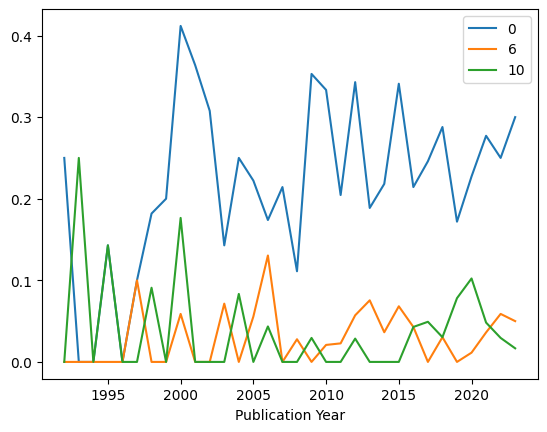

In [ ]:
df_trend1[['0', '6', '10']].plot()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Figurelda1.png')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


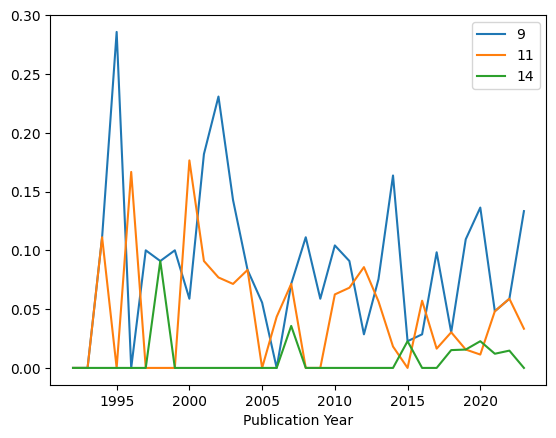

In [ ]:
df_trend1[['9', '11', '14']].plot()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Figurelda2.png')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


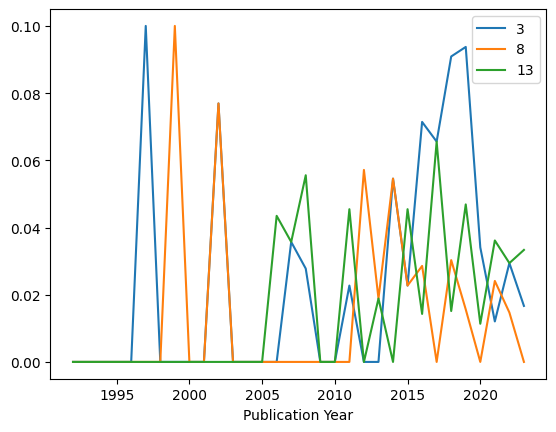

In [ ]:
df_trend1[['3', '8', '13']].plot()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Figurelda3.png')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


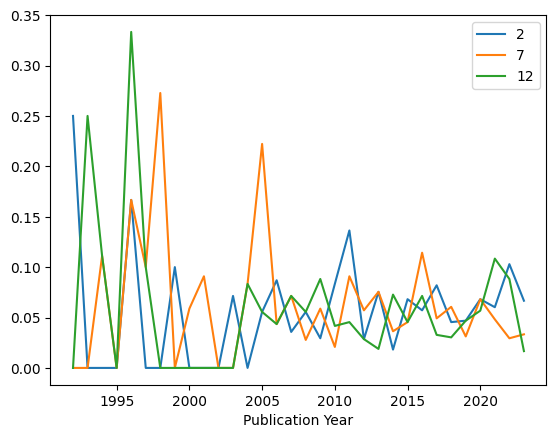

In [ ]:
df_trend1[['2', '7', '12']].plot()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Figurelda4.png')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


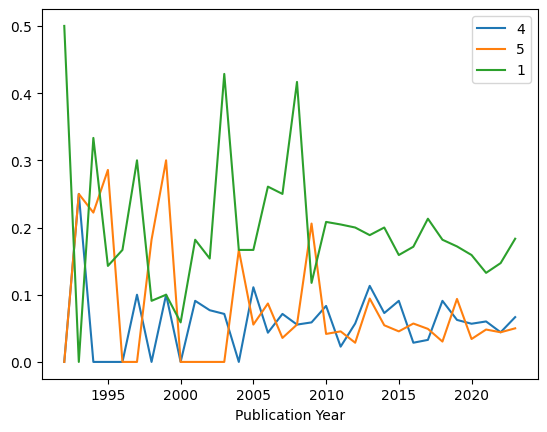

In [ ]:
df_trend1[['4', '5', '1']].plot()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Figurelda5.png')

Interplotate to smooth the plot


In [ ]:
df_temp = pd.DataFrame()
idx = df_trend1.index
xnew = np.linspace(min(idx), max(idx), 300)
for i in [str(m) for m in list(range(0,15))]:
  df_temp[i] = make_interp_spline(idx, df_trend1[i], k=3)((xnew))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

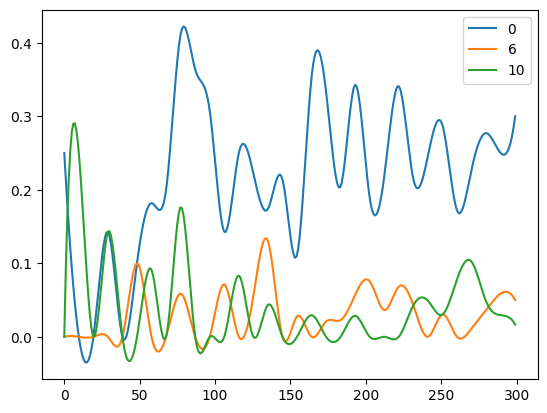

In [ ]:
df_temp[['0', '6', '10']].plot()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

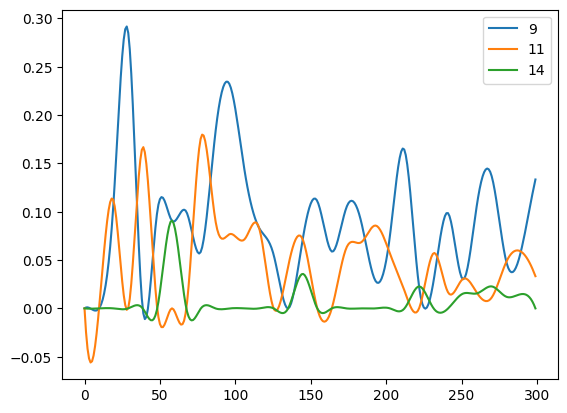

In [ ]:
df_temp[['9', '11', '14']].plot()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

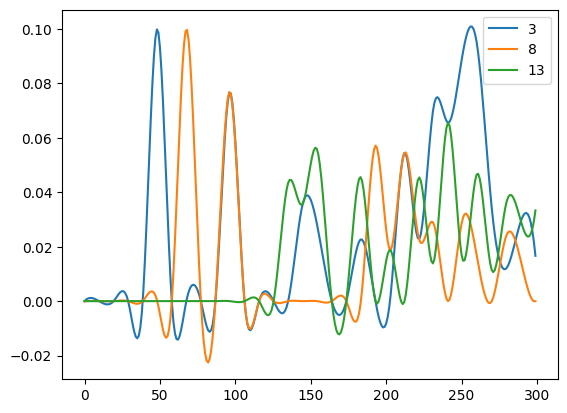

In [ ]:
df_temp[['3', '8', '13']].plot()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

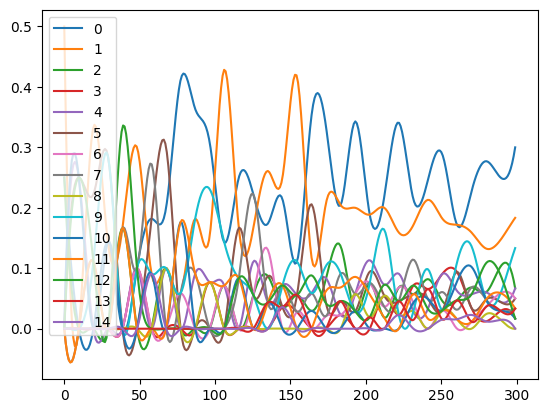

In [ ]:
df_temp.plot()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-137-49fc59b27bbe>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[4].set_xticklabels([1989, 1990, 1995, 2000, 2005, 2010, 2015, 2023])


Text(0.04, 0.5, 'Topic Frequency')

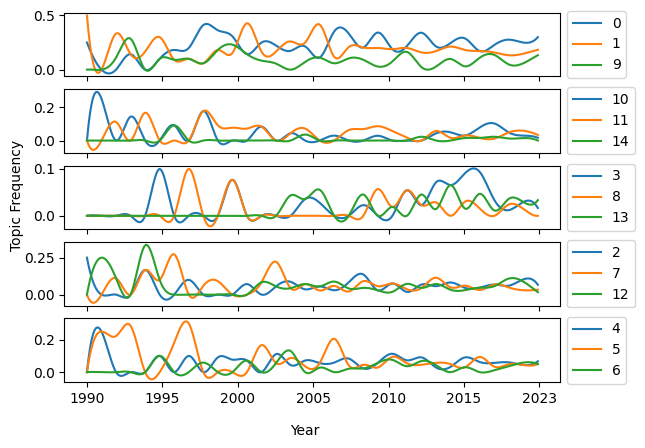

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=1, sharex=True)
df_temp[['0', '1', '9']].plot(ax=axes[0])
df_temp[['10', '11', '14']].plot(ax=axes[1])
df_temp[['3', '8', '13']].plot(ax=axes[2])
df_temp[['2', '7', '12']].plot(ax=axes[3])
df_temp[['4', '5', '6']].plot(ax=axes[4])
axes[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axes[2].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axes[3].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axes[4].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axes[4].set_xticklabels([1989, 1990, 1995, 2000, 2005, 2010, 2015, 2023])
fig.text(0.5, 0, 'Year', ha='center')
fig.text(0.04, 0.5, 'Topic Frequency', va='center', rotation='vertical')